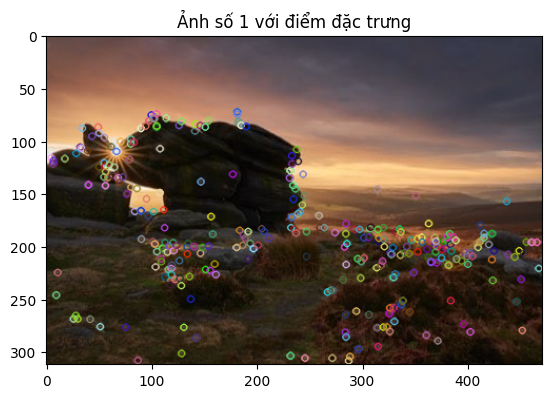

Số điểm đặc trưng trong ảnh số 1: 362


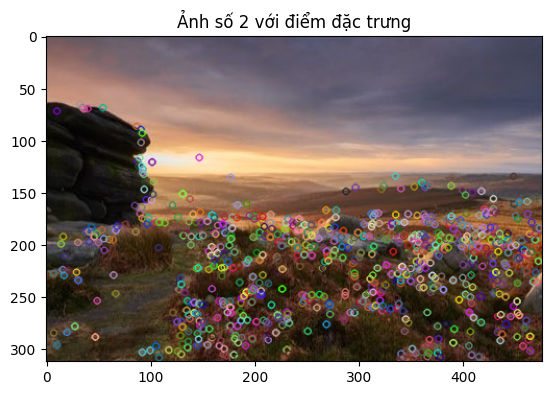

Số điểm đặc trưng trong ảnh số 2: 809
Số matches tốt giữa ảnh 1 và ảnh 2: 123


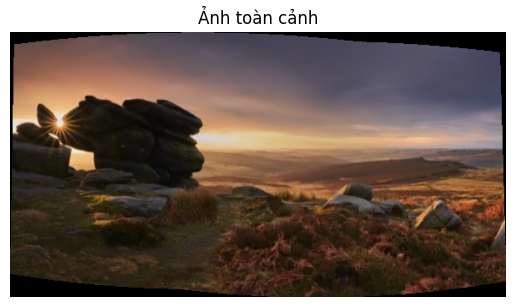

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc các hình ảnh
img1 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\panorama1.jpg')
img2 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\panorama2.jpg')

# Danh sách ảnh và kiểm tra tải thành công
images = [img1, img2]
all_images_loaded = True  # Giả sử tất cả ảnh được tải thành công

# Sử dụng SIFT để tìm điểm đặc trưng
sift = cv2.SIFT_create()
keypoints = []  # Danh sách lưu trữ các điểm đặc trưng của từng ảnh
descriptors = []  # Danh sách lưu trữ các mô tả của từng ảnh

for i, img in enumerate(images, start=1):
    if img is None:
        print(f"Không thể tải ảnh số {i}")
        all_images_loaded = False
    else:
        kp, des = sift.detectAndCompute(img, None)  # Phát hiện và mô tả các điểm đặc trưng
        keypoints.append(kp)
        descriptors.append(des)
        img_with_kp = cv2.drawKeypoints(img, kp, None)  # Vẽ các điểm đặc trưng lên ảnh
        plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))  # Hiển thị ảnh với điểm đặc trưng
        plt.title(f'Ảnh số {i} với điểm đặc trưng')
        plt.show()
        print(f"Số điểm đặc trưng trong ảnh số {i}: {len(kp)}")

# Chỉ tiếp tục nếu tất cả ảnh đã được tải thành công
if all_images_loaded:
    # Sử dụng BFMatcher để so khớp điểm đặc trưng giữa các cặp ảnh
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors[0], descriptors[1], k=2)  # So khớp các mô tả của hai ảnh
    
    # Áp dụng Low's ratio test
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:  # Kiểm tra tỉ lệ khoảng cách để loại bỏ các kết quả không tốt
            good.append(m)
    print(f"Số matches tốt giữa ảnh 1 và ảnh 2: {len(good)}")

    # Khởi tạo Stitcher với cấu hình tùy chỉnh
    stitcher = cv2.Stitcher_create()
    stitcher.setPanoConfidenceThresh(0.6)  # Điều chỉnh ngưỡng tin cậy

    # Thực hiện ghép ảnh
    ret, pano = stitcher.stitch(images)  # Ghép các hình ảnh lại với nhau

    if ret == cv2.Stitcher_OK:
        # Hiển thị ảnh toàn cảnh
        plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
        plt.title('Ảnh toàn cảnh')
        plt.axis('off')
        plt.show()
    else:
        print("Ghép ảnh thất bại, mã lỗi:", ret)
else:
    print("Một hoặc nhiều ảnh không được tải lên thành công, kiểm tra lại đường dẫn hoặc tên file.")


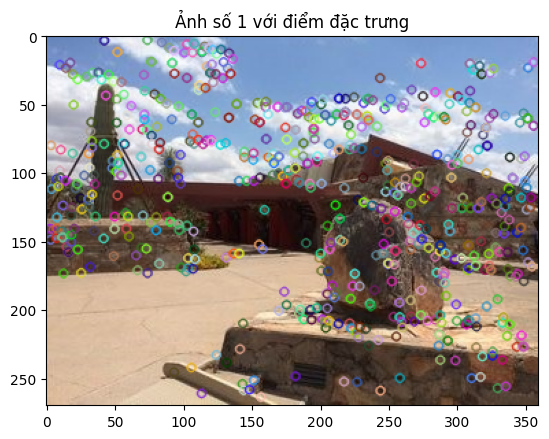

Số điểm đặc trưng trong ảnh số 1: 637


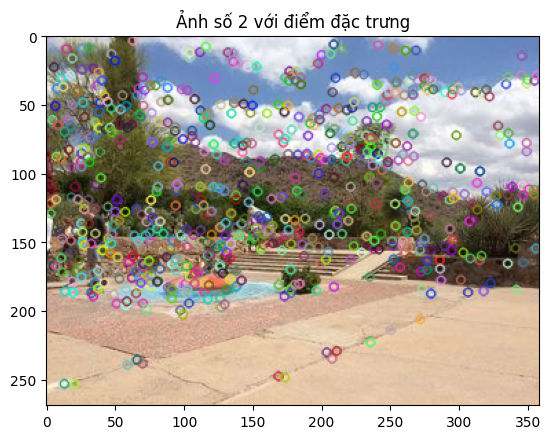

Số điểm đặc trưng trong ảnh số 2: 756


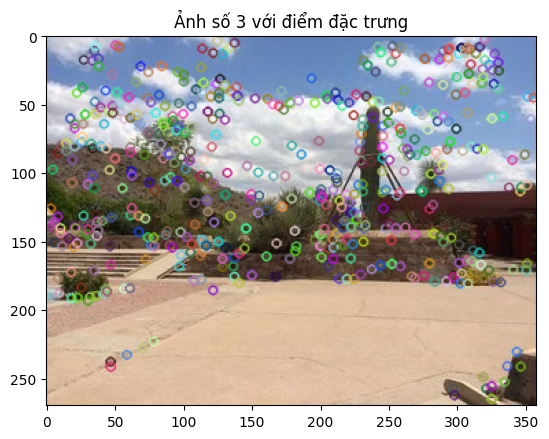

Số điểm đặc trưng trong ảnh số 3: 566
Số matches tốt giữa ảnh 1 và 2: 9
Số matches tốt giữa ảnh 2 và 3: 153


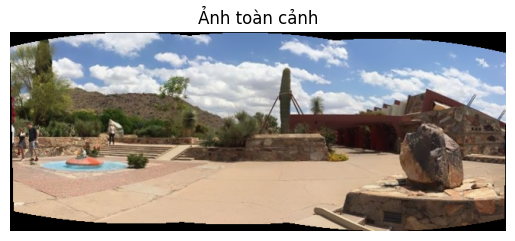

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc các hình ảnh
img1 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\panorama3.jpg')
img2 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\Panorama4.jpg')
img3 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\Panorama5.jpg')

# Danh sách ảnh và kiểm tra tải thành công
images = [img1, img2, img3]
all_images_loaded = True  # Giả sử tất cả ảnh được tải thành công

# Sử dụng SIFT để tìm điểm đặc trưng
sift = cv2.SIFT_create()
keypoints = []
descriptors = []

for i, img in enumerate(images, start=1):
    if img is None:
        print(f"Không thể tải ảnh số {i}")
        all_images_loaded = False
    else:
        kp, des = sift.detectAndCompute(img, None)
        keypoints.append(kp)
        descriptors.append(des)
        img_with_kp = cv2.drawKeypoints(img, kp, None)
        plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))
        plt.title(f'Ảnh số {i} với điểm đặc trưng')
        plt.show()
        print(f"Số điểm đặc trưng trong ảnh số {i}: {len(kp)}")

# Chỉ tiếp tục nếu tất cả ảnh đã được tải thành công
if all_images_loaded:
    # Sử dụng BFMatcher để so khớp điểm đặc trưng giữa các cặp ảnh
    bf = cv2.BFMatcher()
    for i in range(len(images) - 1):
        matches = bf.knnMatch(descriptors[i], descriptors[i+1], k=2)
        # Áp dụng Low's ratio test
        good = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good.append(m)
        print(f"Số matches tốt giữa ảnh {i+1} và {i+2}: {len(good)}")

    # Khởi tạo Stitcher với cấu hình tùy chỉnh
    stitcher = cv2.Stitcher_create()
    stitcher.setPanoConfidenceThresh(0.6)  # Điều chỉnh ngưỡng tin cậy

    # Thực hiện ghép ảnh
    ret, pano = stitcher.stitch(images)

    if ret == cv2.Stitcher_OK:
        # Hiển thị ảnh toàn cảnh
        plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
        plt.title('Ảnh toàn cảnh')
        plt.axis('off')
        plt.show()
    else:
        print("Ghép ảnh thất bại, mã lỗi:", ret)
else:
    print("Một hoặc nhiều ảnh không được tải lên thành công, kiểm tra lại đường dẫn hoặc tên file.")

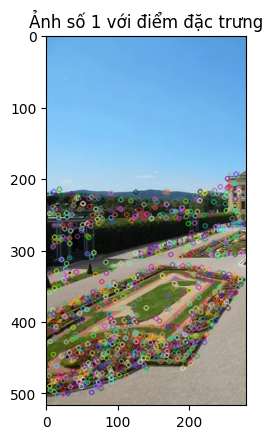

Số điểm đặc trưng trong ảnh số 1: 881


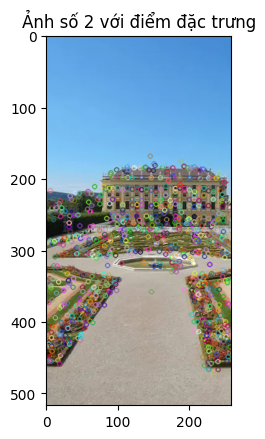

Số điểm đặc trưng trong ảnh số 2: 768


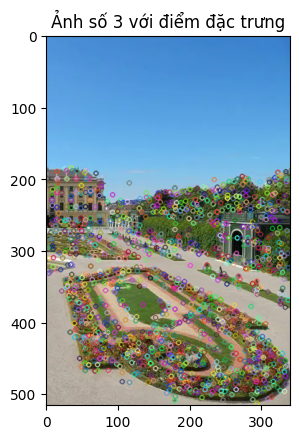

Số điểm đặc trưng trong ảnh số 3: 1384
Số matches tốt giữa ảnh 1 và 2: 182
Số matches tốt giữa ảnh 2 và 3: 226


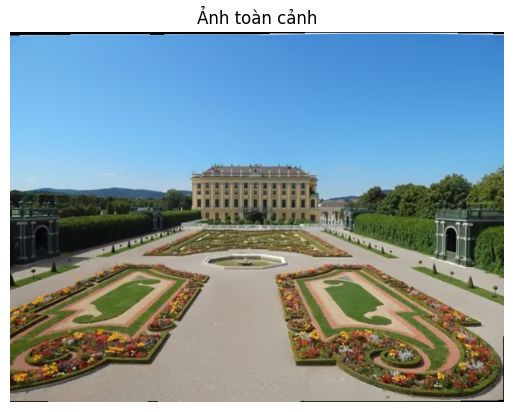

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc các hình ảnh
img1 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\panorama6.png')
img2 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\Panorama7.png')
img3 = cv2.imread('D:\\CoVi_OnThi\\HuuTho_Week8\\Panorama8.png')

# Danh sách ảnh và kiểm tra tải thành công
images = [img1, img2, img3]
all_images_loaded = True  # Giả sử tất cả ảnh được tải thành công

# Sử dụng SIFT để tìm điểm đặc trưng
sift = cv2.SIFT_create()
keypoints = []
descriptors = []

for i, img in enumerate(images, start=1):
    if img is None:
        print(f"Không thể tải ảnh số {i}")
        all_images_loaded = False
    else:
        kp, des = sift.detectAndCompute(img, None)
        keypoints.append(kp)
        descriptors.append(des)
        img_with_kp = cv2.drawKeypoints(img, kp, None)
        plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))
        plt.title(f'Ảnh số {i} với điểm đặc trưng')
        plt.show()
        print(f"Số điểm đặc trưng trong ảnh số {i}: {len(kp)}")

# Chỉ tiếp tục nếu tất cả ảnh đã được tải thành công
if all_images_loaded:
    # Sử dụng BFMatcher để so khớp điểm đặc trưng giữa các cặp ảnh
    bf = cv2.BFMatcher()
    for i in range(len(images) - 1):
        matches = bf.knnMatch(descriptors[i], descriptors[i+1], k=2)
        # Áp dụng Low's ratio test
        good = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good.append(m)
        print(f"Số matches tốt giữa ảnh {i+1} và {i+2}: {len(good)}")

    # Khởi tạo Stitcher với cấu hình tùy chỉnh
    stitcher = cv2.Stitcher_create()
    stitcher.setPanoConfidenceThresh(0.6)  # Điều chỉnh ngưỡng tin cậy

    # Thực hiện ghép ảnh
    ret, pano = stitcher.stitch(images)

    if ret == cv2.Stitcher_OK:
        # Hiển thị ảnh toàn cảnh
        plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
        plt.title('Ảnh toàn cảnh')
        plt.axis('off')
        plt.show()
    else:
        print("Ghép ảnh thất bại, mã lỗi:", ret)
else:
    print("Một hoặc nhiều ảnh không được tải lên thành công, kiểm tra lại đường dẫn hoặc tên file.")